In [135]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

## Load all the Pokemon data

In [136]:
INPUT_DATA_FILE = 'pokemon_data.csv'

if not os.path.exists(INPUT_DATA_FILE):
    raise FileNotFoundError(f"Input data file '{INPUT_DATA_FILE}' not found.")

pokemon_data = pd.read_csv(INPUT_DATA_FILE)
# Display the first 5 rows of the DataFrame
print(pokemon_data.head())

         name  id  type1   type2  hp  attack  defense  special-attack  \
0   bulbasaur   1  grass  poison  45      49       49              65   
1     ivysaur   2  grass  poison  60      62       63              80   
2    venusaur   3  grass  poison  80      82       83             100   
3  charmander   4   fire     NaN  39      52       43              60   
4  charmeleon   5   fire     NaN  58      64       58              80   

   special-defense  speed  
0               65     45  
1               80     60  
2              100     80  
3               50     65  
4               65     80  


In [137]:
# Check data types
print(pokemon_data.dtypes)

name               object
id                  int64
type1              object
type2              object
hp                  int64
attack              int64
defense             int64
special-attack      int64
special-defense     int64
speed               int64
dtype: object


## Explore data related to types

In [138]:
TYPES = set(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric', 'ground',
             'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice', 'dragon', 'dark', 'steel',
             'flying'])

TYPE_COLORS = {
    'normal': '#A8A77A',
    'fire': '#EE8130',
    'water': '#6390F0',
    'electric': '#F7D02C',
    'grass': '#7AC74C',
    'ice': '#96D9D6',
    'fighting': '#C22E28',
    'poison': '#A33EA1',
    'ground': '#E2BF65',
    'flying': '#A98FF3',
    'psychic': '#F95587',
    'bug': '#A6B91A',
    'rock': '#B6A136',
    'ghost': '#735797',
    'dragon': '#6F35FC',
    'dark': '#705746',
    'steel': '#B7B7CE',
    'fairy': '#D685AD',
}

Number of Pokémon with 1 type: 576
Number of Pokémon with 2 types: 726


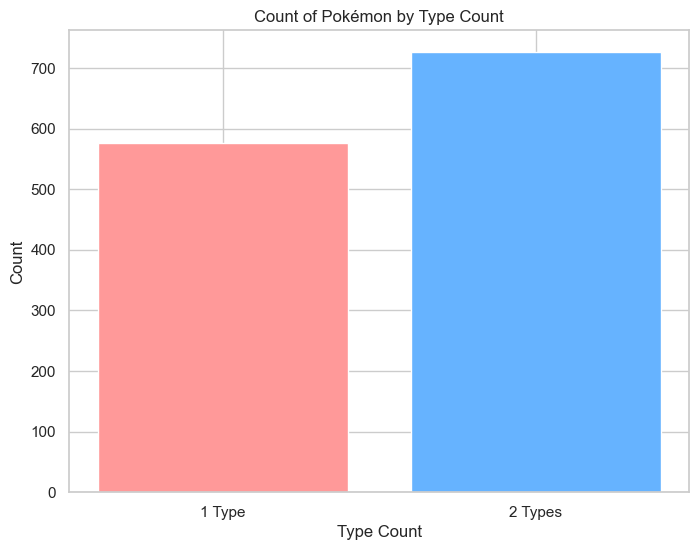

In [139]:
# Count 1 type and 2 types pokemon
def count_types(pokemon_data):
    # Count the number of Pokémon with 1 type and 2 types
    one_type_count = pokemon_data[pokemon_data['type2'].isnull()].shape[0]
    two_type_count = pokemon_data[pokemon_data['type2'].notnull()].shape[0]
    return one_type_count, two_type_count

def plot_count_types(one_type_count, two_type_count):
    # Plot the counts of Pokémon with 1 type and 2 types
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(8, 6))
    plt.bar(['1 Type', '2 Types'], [one_type_count, two_type_count], color=['#FF9999', '#66B3FF'])
    plt.title('Count of Pokémon by Type Count')
    plt.ylabel('Count')
    plt.xlabel('Type Count')
    plt.show()

one_type_count, two_type_count = count_types(pokemon_data)
print(f"Number of Pokémon with 1 type: {one_type_count}")
print(f"Number of Pokémon with 2 types: {two_type_count}")

plot_count_types(one_type_count, two_type_count)

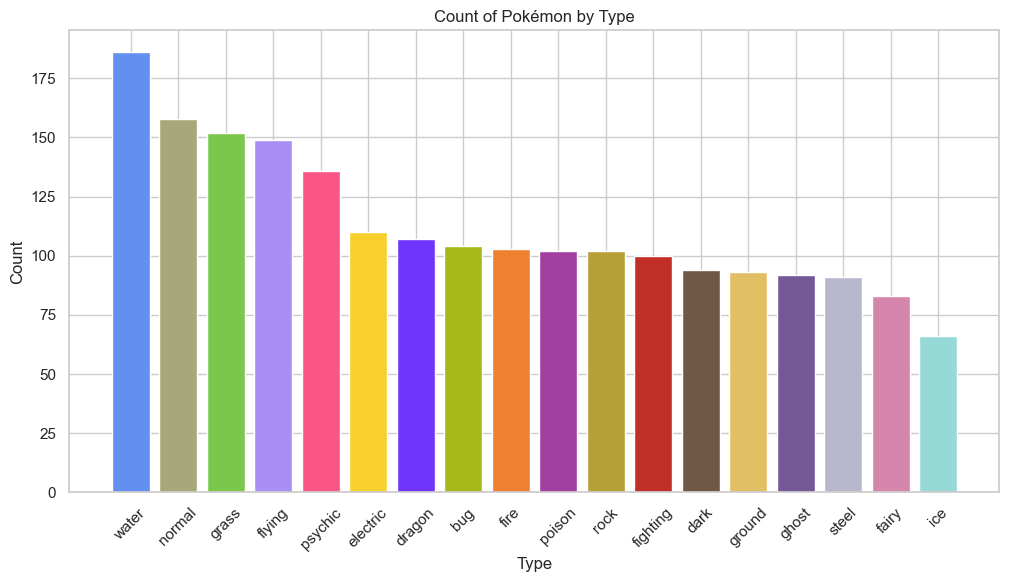

In [140]:
# Count the number of Pokémon for each type
def count_pokemon_by_type(pokemon_data):
    # Count the number of Pokémon for each type
    type_counts = pokemon_data[['type1', 'type2']].melt(value_name='type').dropna()['type'].value_counts()
    return type_counts

# Plot the counts of Pokémon by type
def plot_pokemon_by_type(type_counts):
    # Plot the counts of Pokémon by type
    plt.figure(figsize=(12, 6))
    plt.bar(type_counts.index, type_counts.values, color=[TYPE_COLORS.get(t, '#000000') for t in type_counts.index])
    plt.title('Count of Pokémon by Type')
    plt.ylabel('Count')
    plt.xlabel('Type')
    plt.xticks(rotation=45)
    plt.show()

type_counts = count_pokemon_by_type(pokemon_data)
plot_pokemon_by_type(type_counts)

Co-occurrence counts:
726


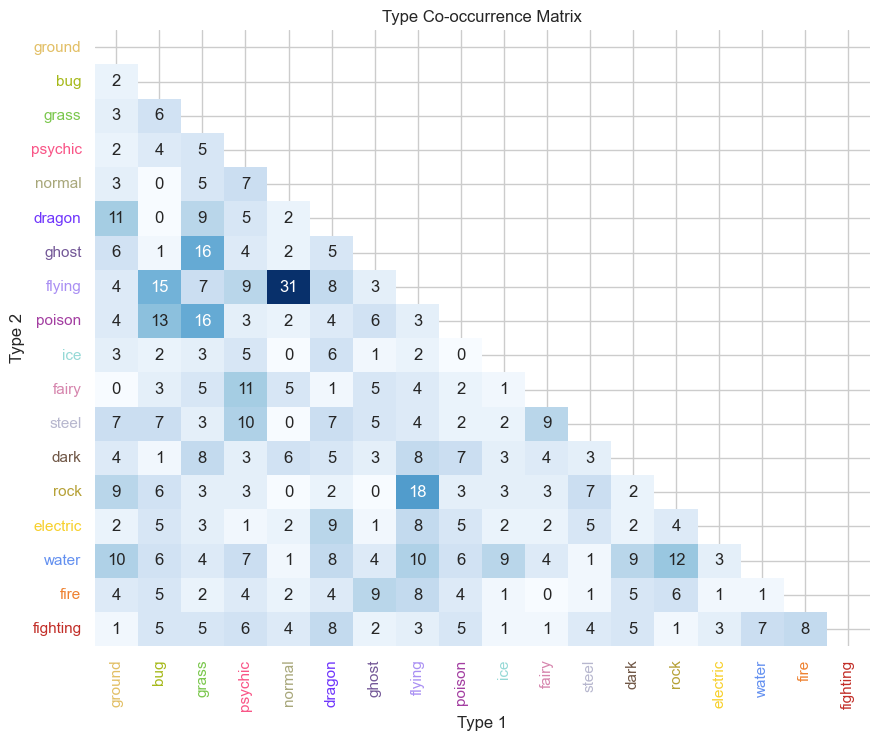

In [149]:
# Get co-ocurrence of types
def get_type_cooccurrence(pokemon_data):
    # Create a DataFrame to store the co-occurrence counts
    type_cooccurrence = pd.DataFrame(0, index=list(TYPES), columns=list(TYPES))

    # Iterate through each Pokémon and update the co-occurrence counts
    for _, row in pokemon_data.iterrows():
        type1 = row['type1']
        type2 = row['type2']
        if pd.notnull(type2):
            type_cooccurrence.at[type1, type2] += 1
            type_cooccurrence.at[type2, type1] += 1

    # Sum all the counts
    print("Co-occurrence counts:")
    print(type_cooccurrence.sum().sum() // 2)

    return type_cooccurrence

def plot_type_cooccurrence(type_cooccurrence):
    # Plot the co-occurrence matrix
    mask = np.triu(np.ones_like(type_cooccurrence))
    
    plt.figure(figsize=(10, 8))
    g = sns.heatmap(type_cooccurrence, annot=True, fmt='d', cmap='Blues', cbar=False, mask=mask)
    g.set_title('Type Co-occurrence Matrix')
    g.set_xlabel('Type 1')
    g.set_ylabel('Type 2')

    for val,label in enumerate(g.get_xticklabels()):
        color = TYPE_COLORS.get(label.get_text(), '#000000')
        label.set_color(color)
    
    for val,label in enumerate(g.get_yticklabels()):
        color = TYPE_COLORS.get(label.get_text(), '#000000')
        label.set_color(color)


    plt.show()

type_cooccurrence = get_type_cooccurrence(pokemon_data)
plot_type_cooccurrence(type_cooccurrence)

## Perform analysis in low-dimensional space

In [142]:
# Get stats
STAT_ROWS = ['hp', 'attack', 'defense', 'special-attack', 'special-defense', 'speed']
stats = pokemon_data[STAT_ROWS].to_numpy()
print("Stats shape:", stats.shape)

# Perform PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(stats)
print("PCA result shape:", pca_result.shape)

# Add PCA result to DataFrame
pokemon_data['pca1'] = pca_result[:, 0]
pokemon_data['pca2'] = pca_result[:, 1]
pokemon_data['pca3'] = pca_result[:, 2]

Stats shape: (1302, 6)
PCA result shape: (1302, 3)


In [143]:
# Analysis on PCA results
print("PCA explained variance ratio:", pca.explained_variance_ratio_)
print("PCA components:\n", pca.components_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

# Each row is a PC, each column a stat
loadings = pd.DataFrame(pca.components_, columns=STAT_ROWS, index=['PC1', 'PC2', 'PC3'])
print(loadings.T)

PCA explained variance ratio: [0.45417337 0.19069429 0.14228838]
PCA components:
 [[ 0.35435805  0.47546111  0.4010967   0.48050421  0.39453966  0.31771481]
 [-0.15271887 -0.12012599 -0.59443326  0.39650548 -0.12796111  0.6597766 ]
 [ 0.08229403  0.66946855 -0.05379999 -0.48438895 -0.47133519  0.29215681]]
Total explained variance: 0.7871560359762012
                      PC1       PC2       PC3
hp               0.354358 -0.152719  0.082294
attack           0.475461 -0.120126  0.669469
defense          0.401097 -0.594433 -0.053800
special-attack   0.480504  0.396505 -0.484389
special-defense  0.394540 -0.127961 -0.471335
speed            0.317715  0.659777  0.292157


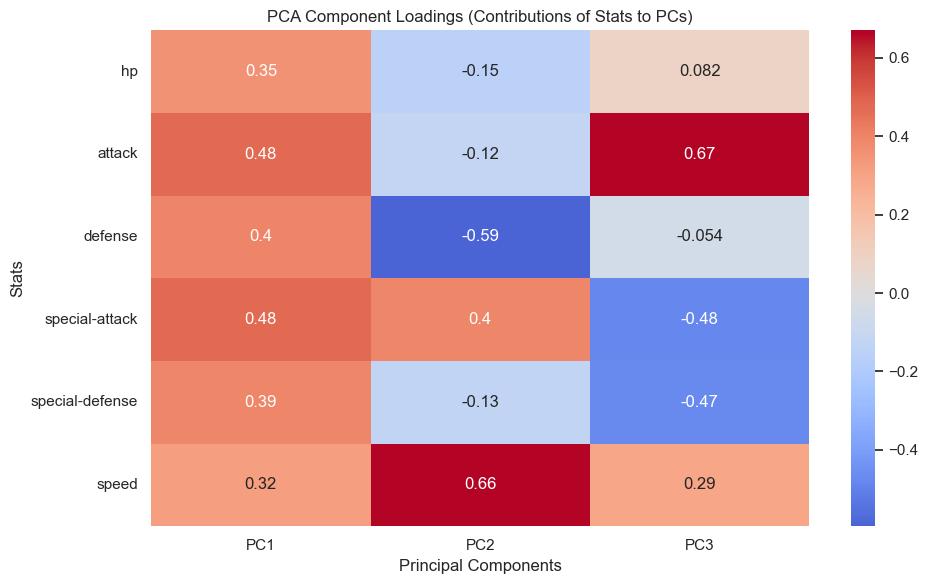

In [144]:
# Assuming your PCA object is already fitted and df contains original stat columns
loadings = pd.DataFrame(
    pca.components_[:3],  # First 3 PCs
    columns=STAT_ROWS,
    index=[f'PC{i+1}' for i in range(3)]
)

plt.figure(figsize=(10, 6))
sns.heatmap(loadings.T, annot=True, cmap='coolwarm', center=0)
plt.title("PCA Component Loadings (Contributions of Stats to PCs)")
plt.ylabel("Stats")
plt.xlabel("Principal Components")
plt.tight_layout()
plt.show()

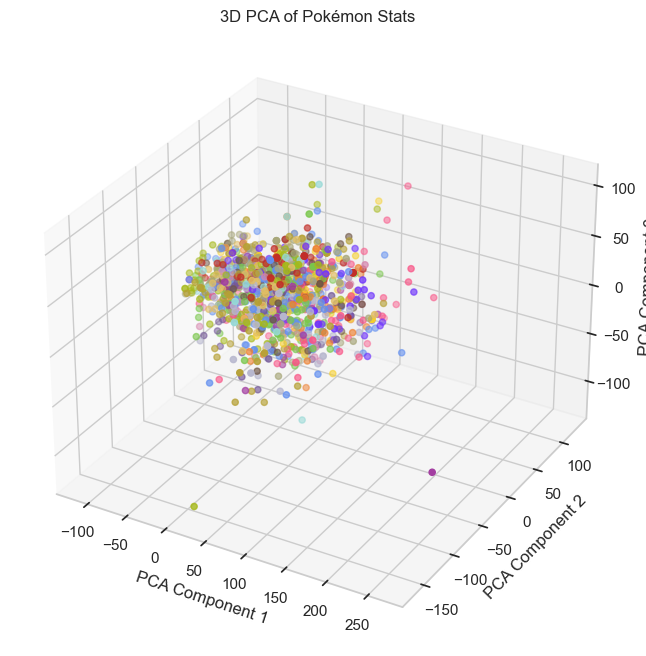

In [145]:
# Plot PCA result
def plot_pca(pokemon_data):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(
        pokemon_data['pca1'], 
        pokemon_data['pca2'], 
        pokemon_data['pca3'], 
        c=[TYPE_COLORS.get(t, '#000000') for t in pokemon_data['type1']], 
        s=20
    )
    ax.set_title('3D PCA of Pokémon Stats')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    plt.show()

plot_pca(pokemon_data)

In [146]:
def find_k_nearest_pokemon(pokemon_data, target, k=5):
    # Calculate the distance from the target point
    distances = np.linalg.norm(pokemon_data[['pca1', 'pca2', 'pca3']].to_numpy() - target, axis=1)
    # Get the indices of the k nearest Pokémon
    nearest_indices = np.argsort(distances)[:k]
    # Return the nearest Pokémon
    return pokemon_data.iloc[nearest_indices]

def find_and_print_nearest_pokemon(pokemon_data, target, k=5):
    nearest_pokemon = find_k_nearest_pokemon(pokemon_data, target, k)
    print(f"Nearest Pokémon to target {target}:")
    print(nearest_pokemon[['name', 'type1', 'type2', 'hp', 'attack', 'defense', 'special-attack', 'special-defense', 'speed']])

print("\nAverage Pokemon:")
find_and_print_nearest_pokemon(pokemon_data, np.array([0, 0, 0]), k=5)

print("\nStrong PCA1 Pokemon:")
find_and_print_nearest_pokemon(pokemon_data, np.array([1000, 0, 0]), k=5)

print("\nStrong PCA2 Pokemon:")
find_and_print_nearest_pokemon(pokemon_data, np.array([0, 1000, 0]), k=5)

print("\nStrong PCA3 Pokemon:")
find_and_print_nearest_pokemon(pokemon_data, np.array([0, 0, 1000]), k=5)



Average Pokemon:
Nearest Pokémon to target [0 0 0]:
               name   type1  type2   hp  attack  defense  special-attack  \
39       wigglytuff  normal  fairy  140      70       45              85   
1183  eevee-starter  normal    NaN   65      75       70              65   
118         seaking   water    NaN   80      92       65              65   
312         volbeat     bug    NaN   65      73       75              47   
147       dragonair  dragon    NaN   61      84       65              70   

      special-defense  speed  
39                 50     45  
1183               85     75  
118                80     68  
312                85     85  
147                70     70  

Strong PCA1 Pokemon:
Nearest Pokémon to target [1000    0    0]:
                     name    type1     type2   hp  attack  defense  \
1214  eternatus-eternamax   poison    dragon  255     115      250   
1103        rayquaza-mega   dragon    flying  105     180      100   
1067        mewtwo-mega-x  p

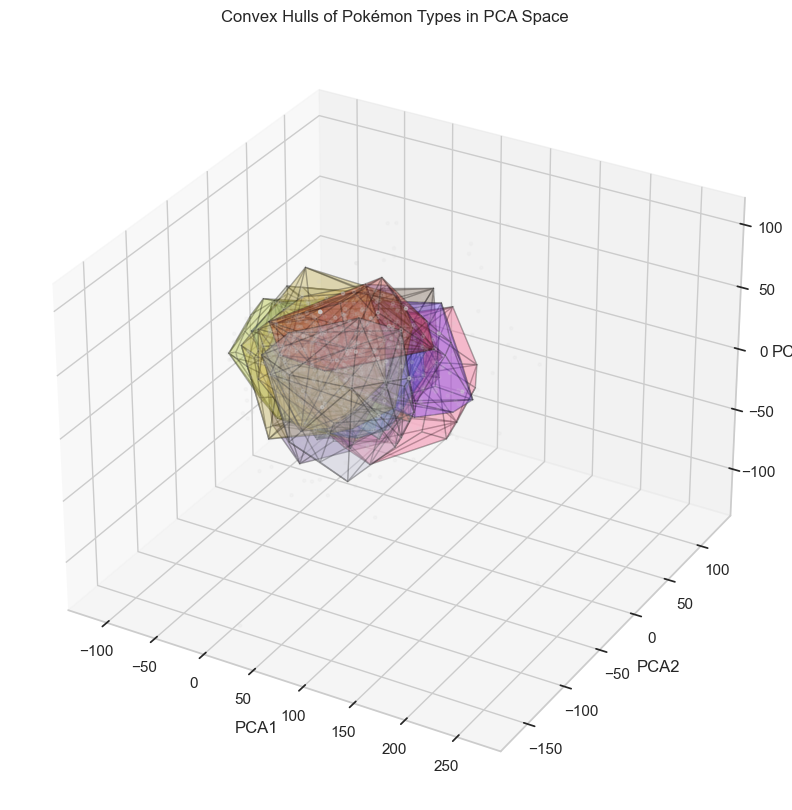

In [147]:
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot all points faintly
ax.scatter(pokemon_data['pca1'], pokemon_data['pca2'], pokemon_data['pca3'],
           c='lightgray', alpha=0.1, s=5)

# Plot convex hulls per class
for t, group in pokemon_data.groupby('type1'):
    if len(group) < 5:
        continue
    points = group[['pca1', 'pca2', 'pca3']].values
    centroid = points.mean(axis=0)
    dists = np.linalg.norm(points - centroid, axis=1)
    cutoff = np.percentile(dists, 80)
    trimmed_points = points[dists <= cutoff]
    
    if len(trimmed_points) >= 4:
        hull = ConvexHull(trimmed_points)
        faces = [trimmed_points[simplex] for simplex in hull.simplices]
        poly = Poly3DCollection(faces, alpha=0.2, facecolor=TYPE_COLORS.get(t, 'gray'), edgecolor='k')
        ax.add_collection3d(poly)
    
    # Optional: mark the centroid
    centroid = points.mean(axis=0)
    ax.text(*centroid, t, fontsize=9)

ax.set_title("Convex Hulls of Pokémon Types in PCA Space")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")

plt.show()